# 1. Import and Install Dependencies

In [1]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

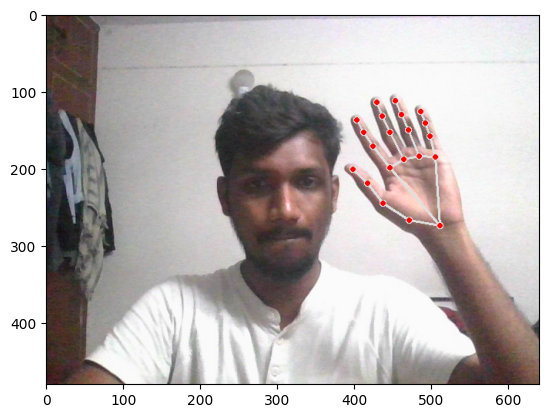

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 7.98522413e-01,  5.71258008e-01,  2.18899075e-07,  7.37026751e-01,
        5.57243943e-01, -1.78674627e-02,  6.84126675e-01,  5.12336671e-01,
       -2.27360651e-02,  6.51874900e-01,  4.58172649e-01, -2.69593820e-02,
        6.22214854e-01,  4.18916613e-01, -3.01760584e-02,  6.98104203e-01,
        4.16075945e-01,  2.13530683e-03,  6.63568318e-01,  3.56489241e-01,
       -9.87671688e-03,  6.44877970e-01,  3.20671111e-01, -2.24016141e-02,
        6.30701780e-01,  2.86223531e-01, -3.18892337e-02,  7.26156175e-01,
        3.91928881e-01,  1.89803788e-04,  6.97758079e-01,  3.20313364e-01,
       -8.13865382e-03,  6.82349563e-01,  2.76562214e-01, -1.84638668e-02,
        6.70473278e-01,  2.39093244e-01, -2.65811849e-02,  7.56454170e-01,
        3.83367002e-01, -6.16981741e-03,  7.34661341e-01,  3.14163029e-01,
       -1.67259853e-02,  7.21123040e-01,  2.71415412e-01, -2.42866147e-02,
        7.08777845e-01,  2.34662801e-01, -2.98829935e-02,  7.90121853e-01,
        3.86066228e-01, -

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 7.98522413e-01,  5.71258008e-01,  2.18899075e-07,  7.37026751e-01,
        5.57243943e-01, -1.78674627e-02,  6.84126675e-01,  5.12336671e-01,
       -2.27360651e-02,  6.51874900e-01,  4.58172649e-01, -2.69593820e-02,
        6.22214854e-01,  4.18916613e-01, -3.01760584e-02,  6.98104203e-01,
        4.16075945e-01,  2.13530683e-03,  6.63568318e-01,  3.56489241e-01,
       -9.87671688e-03,  6.44877970e-01,  3.20671111e-01, -2.24016141e-02,
        6.30701780e-01,  2.86223531e-01, -3.18892337e-02,  7.26156175e-01,
        3.91928881e-01,  1.89803788e-04,  6.97758079e-01,  3.20313364e-01,
       -8.13865382e-03,  6.82349563e-01,  2.76562214e-01, -1.84638668e-02,
        6.70473278e-01,  2.39093244e-01, -2.65811849e-02,  7.56454170e-01,
        3.83367002e-01, -6.16981741e-03,  7.34661341e-01,  3.14163029e-01,
       -1.67259853e-02,  7.21123040e-01,  2.71415412e-01, -2.42866147e-02,
        7.08777845e-01,  2.34662801e-01, -2.98829935e-02,  7.90121853e-01,
        3.86066228e-01, -

# 4. Setup Folders for Collection

In [16]:
# Path for exported data, numpy arrays
# DATA_PATH = os.path.join('C:/Users/Qasim/Documents/Major Project/ActionDetectionforSignLanguage-main/dataset') 
DATA_PATH = os.path.join('E:\Github_projects\Life-Saving-Signs-Real-Time-Detection-of-Emergency-Indian-Sign-Language\Dataset') 


# Actions that we try to detect
actions = np.array(['Accident',  'Call',  'Doctor',  'Help', 'Hot', 'Lose', 'Pain', 'Thief'])

# # Thirty videos worth of data
no_sequences = 90

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

### making directory

In [ ]:
import os
import numpy as np

for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    print("Checking action path:", action_path)
    
    if not os.path.exists(action_path):
        os.makedirs(action_path)
        print("Directory created:", action_path)
    else:
        print("Directory already exists:", action_path)
    
    #change this 
    for sequence in range(61, 91):
        new_dir = os.path.join(action_path, str(sequence))
        print("Creating directory:", new_dir)
        
        if not os.path.exists(new_dir):
            os.makedirs(new_dir)
            print("Sequence directory created:", new_dir)
        else:
            print("Sequence directory already exists:", new_dir)
            continue


In [ ]:
last_two_actions = actions[-2:]

# 5. Collect Keypoint Values for Training and Testing

### collecting images

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in last_two_actions:
        # Loop through sequences aka videos
        for sequence in range(61,91):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                # Create the directory if it doesn't exist
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                
                # Save keypoints to npy_path
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

            # print('Completed collecting frames for {} Video number{}'.format(action, sequence))
            cv2.putText(image, 'Completed collecting frames for {} Video number{}'.format(action, sequence), (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
            cv2.waitKey(3000)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
             
    cap.release()
    cv2.destroyAllWindows()

In [17]:
def check_missing_sequences(actions, no_sequences, sequence_length):
    missing_sequences = []
    for action in actions:
        for video_num in range(1, no_sequences+1):
            for sequence_num in range(sequence_length):
                npy_path = os.path.join(DATA_PATH, action, str(video_num), str(sequence_num) + '.npy')
                if not os.path.exists(npy_path):
                    missing_sequences.append((action, video_num, sequence_num))
    return missing_sequences

In [18]:
missing_sequences = check_missing_sequences(actions, no_sequences, sequence_length)
print("Missing sequences:", missing_sequences)

Missing sequences: []


In [19]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'Accident': 0,
 'Call': 1,
 'Doctor': 2,
 'Help': 3,
 'Hot': 4,
 'Lose': 5,
 'Pain': 6,
 'Thief': 7}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(720, 30, 126)

In [25]:
np.array(labels).shape

(720,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(720, 30, 126)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [30]:
y_test.shape

(108, 8)

# 7. Build and Train LSTM Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\fyzan\anaconda3\envs\isl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - categorical_accuracy: 0.1994 - loss: 1.9760
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.3344 - loss: 1.5897
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.5498 - loss: 1.3270
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.5567 - loss: 1.1163
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.6618 - loss: 1.0369
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - categorical_accuracy: 0.6605 - loss: 0.9466
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.6137 - loss: 1.4808
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.6417 - loss: 0.9817
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.7165 - loss: 0.8056
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.6760 - loss: 0.9076
Epoch 11/300
20/20 

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        48,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,794 (987.48 KB)

 Trainable params: 84,264 (329.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,530 (658.32 KB)

# 8. Make Predictions

In [37]:
res = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [38]:
actions[np.argmax(res[4])]

'Lose'

In [39]:
actions[np.argmax(y_test[4])]

'Lose'

# 9. Save Weights

In [40]:
model.save('action.h5')

In [41]:
del model

# Load Model from weights

In [42]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
actions.shape[0]

8

In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [46]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [47]:
yhat = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


In [48]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [49]:
ytrue

[1,
 1,
 3,
 2,
 5,
 5,
 1,
 6,
 3,
 4,
 4,
 6,
 7,
 3,
 7,
 1,
 3,
 3,
 4,
 6,
 5,
 7,
 0,
 6,
 6,
 6,
 6,
 6,
 4,
 7,
 2,
 1,
 4,
 2,
 0,
 0,
 0,
 1,
 7,
 1,
 4,
 6,
 7,
 0,
 6,
 1,
 1,
 2,
 0,
 5,
 4,
 0,
 4,
 2,
 6,
 5,
 3,
 6,
 5,
 3,
 1,
 2,
 7,
 4,
 2,
 1,
 3,
 3,
 1,
 5,
 4,
 0,
 1,
 0,
 4,
 2,
 2,
 0,
 7,
 1,
 3,
 1,
 2,
 6,
 0,
 2,
 4,
 0,
 6,
 4,
 1,
 5,
 1,
 7,
 0,
 5,
 7,
 3,
 4,
 3,
 1,
 2,
 4,
 5,
 3,
 1,
 1,
 3]

In [50]:
yhat

[1,
 1,
 3,
 2,
 5,
 5,
 1,
 6,
 3,
 4,
 4,
 6,
 7,
 3,
 7,
 1,
 3,
 3,
 4,
 6,
 5,
 7,
 0,
 6,
 6,
 6,
 6,
 6,
 4,
 7,
 2,
 1,
 4,
 2,
 0,
 0,
 0,
 1,
 7,
 1,
 4,
 6,
 7,
 0,
 6,
 1,
 1,
 2,
 0,
 5,
 4,
 0,
 4,
 2,
 6,
 5,
 3,
 6,
 5,
 3,
 1,
 2,
 7,
 4,
 2,
 1,
 3,
 3,
 1,
 5,
 4,
 0,
 1,
 0,
 4,
 2,
 2,
 0,
 7,
 1,
 3,
 1,
 2,
 6,
 0,
 2,
 4,
 0,
 6,
 4,
 1,
 5,
 1,
 4,
 0,
 5,
 7,
 3,
 4,
 3,
 1,
 1,
 4,
 5,
 3,
 1,
 1,
 3]

In [51]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[95,  0],
        [ 0, 13]],

       [[87,  1],
        [ 0, 20]],

       [[96,  0],
        [ 1, 11]],

       [[94,  0],
        [ 0, 14]],

       [[92,  1],
        [ 0, 15]],

       [[98,  0],
        [ 0, 10]],

       [[94,  0],
        [ 0, 14]],

       [[98,  0],
        [ 1,  9]]], dtype=int64)

In [52]:
accuracy_score(ytrue, yhat)

0.9814814814814815

# 11. Test in Real Time

In [5]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# Load your pre-trained LSTM model
model = load_model('action.h5')
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Set up MediaPipe holistic model for hand landmarks
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

# Function to preprocess hand landmarks
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

# Initialize variables for prediction logic
sequence = []
predictions = []

# Threshold for prediction confidence
threshold = 0.5

# Initialize variables for visualization
actions = ['Accident',  'Call',  'Doctor',  'Help', 'Hot', 'Lose', 'Pain', 'Thief']
sentence = []

# Function to draw hand landmarks with styling
def draw_styled_landmarks(image, results):
    # Draw connections between landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255),
                                                                               thickness=2, circle_radius=4),
                               connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255),
                                                                               thickness=2, circle_radius=4),
                               connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))

    # Draw landmarks with different colors for left and right hands
    for hand_landmarks in [results.left_hand_landmarks, results.right_hand_landmarks]:
        if hand_landmarks:
            for idx, landmark in enumerate(hand_landmarks.landmark):
                # Define different colors for left and right hands
                if idx % 3 == 0:
                    color = (255, 0, 0)  # Red for x-coordinate
                elif idx % 3 == 1:
                    color = (0, 255, 0)  # Green for y-coordinate
                else:
                    color = (0, 0, 255)  # Blue for z-coordinate
                # Draw landmark
                cx, cy = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                cv2.circle(image, (cx, cy), 5, color, -1)
    return image

# Function to visualize action probabilities
def prob_viz(probabilities, actions, image):
    # Initialize variables for visualization
    bar_height = 60
    spacing = 3
    bar_margin = (20, 50)
    line_color = (0, 0, 250)
    text_color = (0, 0, 0)
    
    # Sort actions based on probabilities
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_actions = [actions[i] for i in sorted_indices]
    sorted_probabilities = [probabilities[i] for i in sorted_indices]
    
    # Determine the maximum probability
    max_prob = max(sorted_probabilities)

    # Maximum length of the line based on the width of the image frame
    max_line_length = image.shape[1] - 2 * bar_margin[1]
    
    # Draw lines for each action
    for i, (prob, action) in enumerate(zip(sorted_probabilities, sorted_actions)):
        # Calculate the length of the line based on the probability
        line_length = int(prob / max_prob * max_line_length)
        line_length = min(line_length, max_line_length)  # Limit the line length

        # Calculate the position of the line
        start_point = (bar_margin[0], i * (bar_height + spacing) + bar_margin[1] + bar_height // 2)
        end_point = (start_point[0] + line_length, start_point[1])
        
        # Draw the line
        cv2.line(image, start_point, end_point, line_color, 8)
        
        # Draw the action label
        cv2.putText(image, action, (end_point[0] + spacing, end_point[1] + 5), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)
        
        # Draw the probability value
        cv2.putText(image, f"{prob:.2f}", (end_point[0] + spacing, end_point[1] - 15), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)
    
    return image


# Start capturing video from webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Make detections with MediaPipe holistic model
    results = holistic.process(frame_rgb)
    
    # Draw landmarks with styling
    image_with_landmarks = draw_styled_landmarks(frame.copy(), results)

    # Define image_with_probs here to ensure it's accessible in the entire loop
    image_with_probs = image_with_landmarks.copy()
    
    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    
    if len(sequence) == 30:
        # Perform inference
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        predictions.append(np.argmax(res))
        
        # Visualization logic
        if np.unique(predictions[-10:])[0] == np.argmax(res):
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Display predicted action probabilities
        image_with_probs = prob_viz(res, actions, image_with_landmarks.copy())
        
    # Display the sentence
    cv2.rectangle(image_with_probs, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image_with_probs, ' '.join(sentence), (3,30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    # Draw a line to indicate the prediction
    prediction_text = ' '.join(sentence)
    cv2.line(image_with_probs, (10, 40), (10 + len(prediction_text) * 12, 40), (255, 255, 255), 2)
    
    # Show the frame with hand landmarks and predictions
    cv2.imshow('Indian Emergency Hand Sign Detection', image_with_probs)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

In [53]:
cap.release()
cv2.destroyAllWindows()